# Investigate TMDb_Movies Dataset


## Introduction

This dataset is about 10 thousand movies collected from The Movie Database (TMDb),
the dataset consist of 21 columns such as imdb_id, revenue, budget, vote_count etc.

the Questions I will answer

1.Which genres are most popular from year to year?

2.What kinds of properties are associated with movies that have high revenues?

3.what is the 10 top voted movies?

4.What were the most popular produced genres in 2000 compared to 2015?

5.How did the amount of produced films changed over time?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data Wrangling 

### loading the csv file

In [2]:
df = pd.read_csv("tmdb-movies.csv")

### print first five rows

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### close look at the dataset 

to indicate if there are some nun values  
and change the types of some columns   

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

## Data Cleaning

1.remove unused columns in the analysis

2.change the type of release_date to datetime

3.Removing the duplicates

4.Replacing zero with NAN in (runtime, budget, revenue) columns

5.drop rows that contain NAN values in budget, revenue

6.change data type of budget and revenue to int

### We need to remove unused columns in the analysis

In [6]:
df = df.drop(columns=['id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords',
                      'overview', 'production_companies','tagline','cast', 'vote_count'])

In [7]:
df.head()

,budget,revenue,original_title,director,runtime,genres,release_date,vote_average,release_year
0,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015
2,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015
4,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,7.3,2015


### change the type of release_date to datetime

In [8]:
df.release_date = pd.to_datetime(df['release_date'])

In [9]:
df.head()

,budget,revenue,original_title,director,runtime,genres,release_date,vote_average,release_year
0,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015
2,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.5,2015
4,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,7.3,2015


### Removing the duplicates

In [10]:
df.drop_duplicates(keep ='first', inplace=True)

### Replacing zero with NAN in (runtime, budget, revenue)  columns

In [11]:
df['runtime'] = df['runtime'].replace(0, np.NAN)
df['budget']  = df['budget'].replace(0, np.NAN)
df['revenue'] = df['revenue'].replace(0, np.NAN)

### drop rows that contain NAN values in budget, revenue

In [12]:
df.dropna(subset=['budget', 'revenue'], inplace = True)

### change data type of budget and revenue to int

In [13]:
df = df.astype({'budget': 'int64', 'revenue': 'int64'})

In [14]:
# adding new column (profit) using lambda function
x = lambda a, b : a - b
profit = x(df['revenue'],df['budget'])
df.insert(2,'profit',profit)

In [15]:
df.shape

(3854, 10)

## Exploratory Data Analysis


In [16]:
df.describe()

,budget,revenue,profit,runtime,vote_average,release_year
count,3.854000e+03,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000
mean,3.720370e+07,1.076866e+08,7.048292e+07,109.220291,6.168163,2001.261028
std,4.220822e+07,1.765393e+08,1.506195e+08,19.922820,0.794920,11.282575
min,1.000000e+00,2.000000e+00,-4.139124e+08,15.000000,2.200000,1960.000000
25%,1.000000e+07,1.360003e+07,-1.321535e+06,95.000000,5.700000,1995.000000
50%,2.400000e+07,4.480000e+07,2.002019e+07,106.000000,6.200000,2004.000000
75%,5.000000e+07,1.242125e+08,8.170331e+07,119.000000,6.700000,2010.000000
max,4.250000e+08,2.781506e+09,2.544506e+09,338.000000,8.400000,2015.000000


the runtime average is 109 minutes

50% of movies have a runtime of less than 106 minutes. (median)

In [17]:
# top ten costed movies
df.nlargest(10, ['budget'])['original_title']

2244                              The Warrior's Way
3375    Pirates of the Caribbean: On Stranger Tides
7387       Pirates of the Caribbean: At World's End
14                          Avengers: Age of Ultron
6570                               Superman Returns
1929                                        Tangled
4411                                    John Carter
7394                                   Spider-Man 3
5508                                The Lone Ranger
634       The Hobbit: The Battle of the Five Armies
Name: original_title, dtype: object

In [34]:
# top ten movies with the biggest profit
df.nlargest(10, ['profit'])['original_title']

1386                                          Avatar
3                       Star Wars: The Force Awakens
5231                                         Titanic
0                                     Jurassic World
4                                          Furious 7
4361                                    The Avengers
3374    Harry Potter and the Deathly Hallows: Part 2
14                           Avengers: Age of Ultron
5422                                          Frozen
8094                                         The Net
Name: original_title, dtype: object

In [18]:
df.dtypes

budget                     int64
revenue                    int64
profit                     int64
original_title            object
director                  object
runtime                  float64
genres                    object
release_date      datetime64[ns]
vote_average             float64
release_year               int64
dtype: object

### correlation between quantative attributes

In [19]:
df.corr(method ='pearson')

,budget,revenue,profit,runtime,vote_average,release_year
budget,1.000000,0.688556,0.526818,0.260977,0.024169,0.268040
revenue,0.688556,1.000000,0.979133,0.250298,0.227123,0.139140
profit,0.526818,0.979133,1.000000,0.220238,0.259435,0.087971
runtime,0.260977,0.250298,0.220238,1.000000,0.351712,-0.112453
vote_average,0.024169,0.227123,0.259435,0.351712,1.000000,-0.134246
release_year,0.268040,0.139140,0.087971,-0.112453,-0.134246,1.000000


we can tell that there is a positive correlation between the budget and the revenue
we can tell that there is a positive correlation between the vote_average and the revenue

Text(0.5, 1.0, 'budget vs revenue')

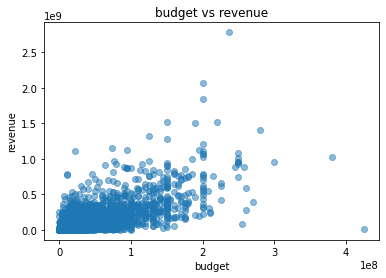

In [20]:
plt.scatter(df['budget'], df['revenue'],alpha=0.5)
plt.xlabel('budget')
plt.ylabel('revenue')
plt.title('budget vs revenue')

### histogram of quantative attributes

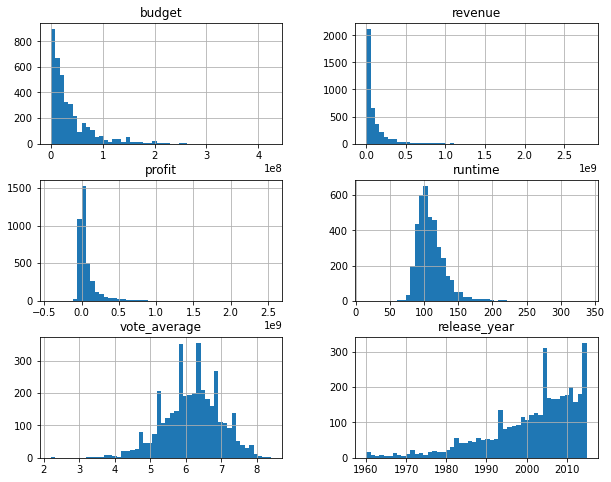

In [21]:
df.hist(bins=50, figsize=(10,8))
plt.show()

In [22]:
df['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

the average run time is 109 minutes and the median run time is 106 minutes

### How did the amount of produced films changed over time?

Text(0, 0.5, 'Number of movies')

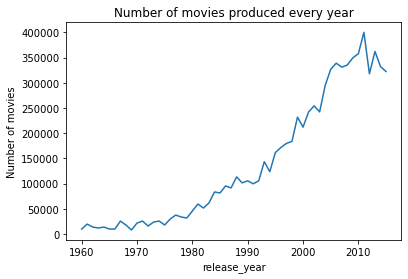

In [23]:
profits_year = df.groupby('release_year')['release_year'].sum()
profits_year.plot(kind='line')
plt.title('Number of movies produced every year')
plt.ylabel('Number of movies')

as we noticed from the previous plot that the number of produced movies increases every year

### the relation between the profit and the time

Text(0, 0.5, 'profit per year')

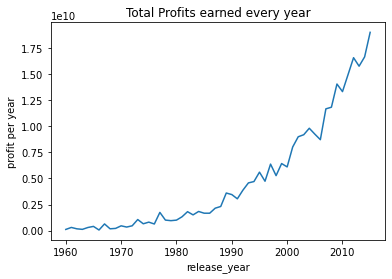

In [24]:
profits_year = df.groupby('release_year')['profit'].sum()
profits_year.plot(kind='line')
plt.title('Total Profits earned every year')
plt.ylabel('profit per year')

it seems there is a positive relationship between the profit and the time

### Which genres are most popular from year to year?

In [25]:
count = df['genres'].str.cat(sep = '|')

data = pd.Series(count.split('|'))
data = data.value_counts(ascending = False)

data.head(7)

Drama        1756
Comedy       1358
Thriller     1204
Action       1085
Adventure     749
Romance       667
Crime         651
dtype: int64

Another way to calculate Which genres are most popular from year to year?

In [31]:
count_genres = df['genres'].str.split('|', expand=True)
count_genres.head()

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [27]:
item_counts = count_genres[0].value_counts() + count_genres[1].value_counts() + count_genres[2].value_counts() + count_genres[3].value_counts() + count_genres[4].value_counts()
            
item_counts.sort_values(ascending=False).head(7)

Drama        1756.0
Comedy       1358.0
Thriller     1204.0
Action       1085.0
Adventure     749.0
Romance       667.0
Crime         651.0
dtype: float64

### ploting the genres of movies

Text(0.5, 0, 'Number of movies')

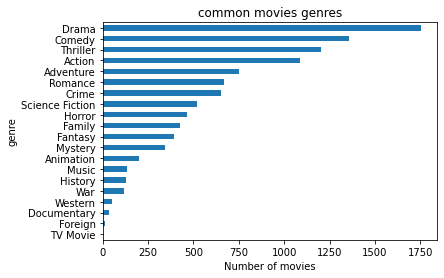

In [28]:
data.plot(kind='barh').invert_yaxis()
plt.title('common movies genres')
plt.ylabel('genre')
plt.xlabel('Number of movies')

from the previous plot we found that The most common movies are in order

1.Drama

2.Comedy

3.thriller

4.Action

5.Adventure


### what is the top voted movies?

In [29]:
top_voted = df.sort_values(['vote_average'], ascending = False)

In [30]:
top_voted['original_title'].head(10)

4178     The Shawshank Redemption
7948            Stop Making Sense
7269                The Godfather
650                      Whiplash
4179                 Forrest Gump
10222            Schindler's List
2875              The Dark Knight
4177                 Pulp Fiction
2409                   Fight Club
9758       The Godfather: Part II
Name: original_title, dtype: object

# Conclusions
    Limitations:  
    The data set is only between 2001 and 2015  
    there are may NAN values at the Revenue and Budget colums  
  

After this intersting analysis for TMDb dataset and abstract conclusions after each analysis or visualtion step here are some final thoughts:

Average duration of the movie must be 109 minutes.

the top movies genres are : Drama, Comedy, Thriller, Action, Adventure.

the top voted movies are :

         The Shawshank Redemption  
         Stop Making Sense  
         The Godfather    
         Whiplash  
         Forrest Gump  
         Schindler's List  
         The Dark Knight  
         Pulp Fiction  
         Fight Club  
         The Godfather: Part II  
     
     